## Fifa 19 - Top 25 Players

This project will examine the 25 highest rated players on Fifa 19. At first, we will attempt to look at which attributes make these players some of the best in their positions. This can potentially be done by grouping players that play in similar positions, and then seeing which attributes they are strong at.

The first step will be to read the data from the csv file obtained from kaggle.com/datasets, and trim it down to only the top 25 players that we are interested in for this portion of the project.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('data.csv')
top25_data = data.head(25)
top25_data.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


The describe function was used to get some statistical information about our dataset to give us some idea (including numerical ranges and averages) of the data that we are working with.

In [3]:
top25_data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000
mean,12.000000,176332.320000,28.840000,90.20000,91.000000,2000.24000,3.960000,3.600000,3.000000,9.640000,...,66.840000,83.800000,50.040000,46.240000,41.720000,25.960000,25.68000,25.560000,26.040000,27.440000
std,7.359801,37147.671538,2.910899,1.47196,1.683251,332.69484,0.675771,0.816497,1.290994,6.356624,...,22.621303,8.736895,26.286055,28.718867,28.365942,31.837452,32.01786,30.106865,31.517826,32.262052
min,0.000000,20801.000000,24.000000,89.00000,89.000000,1311.00000,3.000000,2.000000,1.000000,1.000000,...,11.000000,66.000000,15.000000,10.000000,10.000000,3.000000,3.00000,2.000000,4.000000,3.000000
25%,6.000000,168542.000000,27.000000,89.00000,90.000000,1946.00000,4.000000,3.000000,2.000000,7.000000,...,50.000000,82.000000,27.000000,21.000000,19.000000,7.000000,8.00000,7.000000,7.000000,10.000000
50%,12.000000,183277.000000,29.000000,90.00000,91.000000,2143.00000,4.000000,4.000000,3.000000,9.000000,...,75.000000,85.000000,52.000000,42.000000,33.000000,12.000000,11.00000,13.000000,13.000000,11.000000
75%,18.000000,192985.000000,32.000000,91.00000,92.000000,2201.00000,4.000000,4.000000,4.000000,10.000000,...,85.000000,90.000000,68.000000,76.000000,69.000000,15.000000,15.00000,15.000000,15.000000,15.000000
max,24.000000,215914.000000,33.000000,94.00000,94.000000,2346.00000,5.000000,5.000000,5.000000,22.000000,...,90.000000,96.000000,93.000000,93.000000,91.000000,90.000000,92.00000,91.000000,88.000000,94.000000


### Players by Overall rating

Here, each player and their Overall rating in Fifa 19 were plotted. Additionally, the mean Overall rating for the top 25 players was found. This gives us a rough idea of the range we are working with.

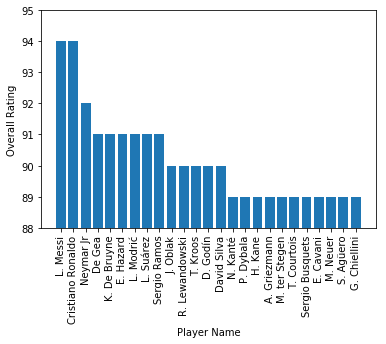

the mean Overall rating is 90.2
the median Overall rating is 90.0


In [4]:
plt.xlabel('Player Name')
plt.ylabel('Overall Rating')
bar = plt.bar(top25_data['Name'], top25_data['Overall'])
plt.xticks(rotation='vertical')
plt.ylim(88, 95)
plt.show()

mean_overall = np.mean(top25_data['Overall'])
median_overall = np.median(top25_data['Overall'])
print('the mean Overall rating is', mean_overall)
print('the median Overall rating is', median_overall)

The mean Overall rating was found to be 90.2 and the median is 90. Upon looking at the graph and the data, it was seen that the highest rating (Messi and Ronaldo) was 94 whilst the lowest was 89. The first thing to point out, was that both the mean and median values are far closer to the lowest value than the highest. This was simply because the majority of our players had Overall ratings of 89, 90 or 91. Neymar on 92, no one on 93 and finally Messi and Ronaldo on 94.

### Peak Player Age

Assuming that the players will need to be at or near their peak in order to reach the Top 25, we can create a histogram in order to find out what ages that players might peak at.

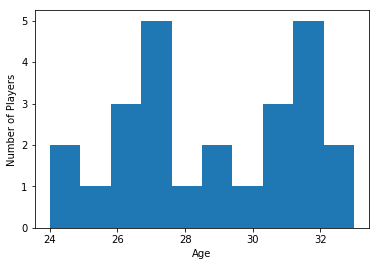

In [5]:
plt.xlabel('Age')
plt.ylabel('Number of Players')
ax = plt.hist(top25_data['Age'], bins=10)
plt.show()

There happen to be two peaks, one at 27 years old another at 32 years old. This is a little surprising because it would've been expected that, in general, a player would be at their best between 27 and 30 years old. Hence, the slight void from 28 to 30 years old was unanticipated. 

A more in depth analysis could've been executed to solve this uncertainty, but a quick review of the data should suffice. 

In [6]:
print('27 year old players:')
print(top25_data['Name'][top25_data['Age'] == 27])
print('\n32 year old players:')
print(top25_data['Name'][top25_data['Age'] == 32])

27 year old players:
3           De Gea
4     K. De Bruyne
5        E. Hazard
14        N. Kanté
17    A. Griezmann
Name: Name, dtype: object

32 year old players:
6        L. Modrić
8     Sergio Ramos
12        D. Godín
13     David Silva
22        M. Neuer
Name: Name, dtype: object


The names of each of the players in the peaks of the histogram have been printed. Using my knowledge of football and of these players, I can attempt to draw conclusions. 

The first thing to note is that aside from De Gea and maybe De Bruyne, the players in the 27 year old bracket appear to rely far more on attributes such as pace and stamina than the players in the 32 year old bracket. Griezmann and Hazard are extremely pacey, and Kanté and De Bruyne have very good stamina. 

Meanwhile the players in the 32 year old bracket, seem to rely slightly more on technical abilities or strength and jumping. Modrić and Silva are both very technical midfielders, while the Centrebacks - Ramos and Godín have good defensive technical stats and are also very strong and can jump high.

Although this was a fairly small dataset and it may be difficult to come to a strong conclusion, it can be said that there are likely to be different peaks in terms of age for different roles in football. For more defensive or technical players this seems to be slightly later than those who have great pace or stamina at their disposal.

### Sorting by Position

In [7]:
columns_to_drop = ['ID', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 
                   'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 
                   'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 
                   'Weight', 'Release Clause', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 
                   'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
attributes = top25_data.drop(labels=columns_to_drop, axis=1)

gk = attributes[attributes.Position == 'GK'].drop(labels='Position', axis=1)
cb = attributes[(attributes.Position == 'CB') | (attributes.Position == 'LCB') | (attributes.Position == 'RCB')].drop(labels='Position', axis=1)
fb = attributes[(attributes.Position == 'RB') | (attributes.Position == 'LB')].drop(labels='Position', axis=1)
cm = attributes[(attributes.Position == 'CM') | (attributes.Position == 'RCM') | (attributes.Position == 'LCM') | (attributes.Position == 'CDM') | (attributes.Position == 'CAM') | (attributes.Position == 'RDM') | (attributes.Position == 'LDM')].drop(labels='Position', axis=1)
wf = attributes[(attributes.Position == 'RW') | (attributes.Position == 'LW') | (attributes.Position == 'RF') | (attributes.Position == 'LF')].drop(labels='Position', axis=1)
st = attributes[(attributes.Position == 'ST') | (attributes.Position == 'RS') | (attributes.Position == 'LS')].drop(labels='Position', axis=1)

total = len(gk) + len(cb) + len(fb) + len(cm) + len(wf) + len(st)

Unneeded columns were dropped and the players were sorted based on positions. Similar positions were grouped together (such as Right Wing, Left Wing, Right Forward and Left Forward). Perhaps in the future we will look at players who can play multiple positions, but for now each player will only be in a single group.

Lengths of each set were summed to ensure that we haven't missed any players out, as there should be 25 players in total. Fullbacks have been ommited since there were no fullbacks within the top 25 players.

A function was written to drop all columns that have no players of a position with a value greater than 85 in that particular attribute. This was so that only the key attributes that are needed to excel in the given position were present.

In [8]:
def get_best_stats(data, threshold=85):
    all_stats = data.max().drop(labels='Name')
    best_columns = ['Name'] + list(all_stats[all_stats >= threshold].index)
    best_stats = data[best_columns]
    return best_stats

### Goalkeepers
This function was then applied to each position, starting with Goalkeepers.

In [9]:
gk_best_stats = get_best_stats(gk)
gk_best_stats.head(len(gk_best_stats))

,Name,Reactions,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
3,De Gea,90.0,90.0,85.0,87.0,88.0,94.0
9,J. Oblak,86.0,86.0,92.0,78.0,88.0,89.0
18,M. ter Stegen,85.0,87.0,85.0,88.0,85.0,90.0
19,T. Courtois,84.0,85.0,91.0,72.0,86.0,88.0
22,M. Neuer,84.0,90.0,86.0,91.0,87.0,87.0


For Goalkeepers, we can immediately tell that the attributes in the table above are key for the role - since essentially all the world class goalkeepers featured in the table score highly. Another thing to point out, is that none of the goalkeepers have any attributes above 85 other than the ones featured in the table. Hence, those stats have been ommited based on our previous code. 

In [10]:
gk_best_stats.mean()

Reactions        85.8
GKDiving         87.6
GKHandling       87.8
GKKicking        83.2
GKPositioning    86.8
GKReflexes       89.6
dtype: float64

The top 5 Goalkeepers - featured in the table - score highest in the GKReflexes stat on average, followed by GKHandling and GKDiving. This seems to suggest that either these are the most important values required in a top goalkeeper, or that these stats are easier to attain at a very high level. If we assume that stats are normalised in Fifa, then we can conclude that the former is more likely to be correct.

### Centrebacks and Fullbacks

There are far fewer Defenders within the top 25 than any other position. No Fullbacks at all, and only three Centrebacks. The highest rated Fullback, Marcelo, narrowly misses out with his Overall rating being 88.

As a result, we are not going to analyse the Fullback position. However, we can guess which attributes may be important based on the role that a Fullback must fulfil. They are likely to require good defensive stats such as Interceptions, Marking, Standing Tackle and Sliding Tackle. Additionally, they are positioned out wide so they will also require good Crossing, Acceleration and Pace - which are also common traits of a good Winger.

In [11]:
cb_best_stats = get_best_stats(cb)
cb_best_stats.head(len(cb_best_stats))

,Name,HeadingAccuracy,Reactions,Jumping,Strength,Aggression,Interceptions,Marking,StandingTackle,SlidingTackle
8,Sergio Ramos,91.0,85.0,93.0,83.0,88.0,90.0,87.0,92.0,91.0
12,D. Godín,92.0,85.0,91.0,88.0,89.0,88.0,90.0,89.0,89.0
24,G. Chiellini,83.0,82.0,89.0,89.0,92.0,88.0,93.0,93.0,90.0


For Centrebacks, as expected they are very good at the main defensive attributes (Interceptions, Marking, Standing Tackle and Sliding Tackle). The main physical stats are Jumping and Strength - which makes sense considering central defenders need to be strong in the air and be able to hold off opposing attacking players. 

In [12]:
cb_best_stats.mean().round(1)

HeadingAccuracy    88.7
Reactions          84.0
Jumping            91.0
Strength           86.7
Aggression         89.7
Interceptions      88.7
Marking            90.0
StandingTackle     91.3
SlidingTackle      90.0
dtype: float64

Centrebacks appear to have a wider range of important stats when compared to Goalkeepers. As expected, core defending stats such as Marking, Standing Tackle and Sliding Tackle average the highest. Somewhat surprisingly however, Jumping averages as high as 91 for the three players. It is an important attribute for Centrebacks in clearing ariel balls into the box, but it was expected that it would be around 85 rather than 91.0. 

### Central Midfielders

The Central Midfielder category contains very defensive players like Kanté and Busquets, as well as Griezmann - who can almost function as a second striker. The top three midfielders - De Bruyne, Modrić and Kroos - appear to be the most well rounded out of the lot however. As a result, it was expected that some stats are only important for certain types of Midfielders, yet some other stats may be integral for all Midfielders. 

In [13]:
cm_best_stats = get_best_stats(cm)
cm_best_stats.head(len(cm_best_stats))

,Name,Crossing,Finishing,ShortPassing,Volleys,Dribbling,Curve,LongPassing,BallControl,Acceleration,...,Stamina,LongShots,Aggression,Interceptions,Positioning,Vision,Composure,Marking,StandingTackle,SlidingTackle
4,K. De Bruyne,93.0,82.0,92.0,82.0,86.0,85.0,91.0,91.0,78.0,...,90.0,91.0,76.0,61.0,87.0,94.0,88.0,68.0,58.0,51.0
6,L. Modrić,86.0,72.0,93.0,76.0,90.0,85.0,88.0,93.0,80.0,...,89.0,82.0,62.0,83.0,79.0,92.0,84.0,60.0,76.0,73.0
11,T. Kroos,88.0,76.0,92.0,82.0,81.0,86.0,93.0,90.0,64.0,...,75.0,92.0,60.0,82.0,79.0,86.0,85.0,72.0,79.0,69.0
13,David Silva,84.0,76.0,93.0,82.0,89.0,82.0,87.0,94.0,70.0,...,78.0,75.0,57.0,50.0,89.0,92.0,93.0,59.0,53.0,29.0
14,N. Kanté,68.0,65.0,86.0,56.0,79.0,49.0,81.0,80.0,82.0,...,96.0,69.0,90.0,92.0,71.0,79.0,85.0,90.0,91.0,85.0
17,A. Griezmann,82.0,90.0,83.0,87.0,88.0,84.0,76.0,90.0,88.0,...,83.0,82.0,69.0,35.0,91.0,83.0,87.0,59.0,47.0,48.0
20,Sergio Busquets,62.0,67.0,89.0,44.0,80.0,66.0,82.0,88.0,50.0,...,86.0,54.0,85.0,87.0,77.0,87.0,90.0,90.0,86.0,80.0


For Central Midfielders, a massive 26 columns remain after disregarding rows with no values above 85. It was always anticipated that Central Midfielders would have the greatest assortment of attributes due to the role that they play. Additionally, CDMs, CMs and CAMs have all been grouped - which results in some players being better in defence and other better in offence. 

Looking at the mean values helped us find the core stats for Central Midfielders.

In [21]:
cm_best_stats.mean().round(1)

Crossing          80.4
Finishing         75.4
ShortPassing      89.7
Volleys           72.7
Dribbling         84.7
Curve             76.7
LongPassing       85.4
BallControl       89.4
Acceleration      73.1
SprintSpeed       69.9
Agility           81.7
Reactions         90.0
Balance           79.4
ShotPower         77.3
Jumping           65.4
Stamina           85.3
LongShots         77.9
Aggression        71.3
Interceptions     70.0
Positioning       81.9
Vision            87.6
Composure         87.4
Marking           71.1
StandingTackle    70.0
SlidingTackle     62.1
dtype: float64

Judging from the mean stats - we can deduce that Short Passing, Ball Control, Reactions, Vision and Composure are of utmost importance in a good Central Midfielder. The other stats really depend on the type of midfielder the player is. 

### Wingers
It's expected that Wingers will be very fast, have good ball control, crossing and good attacking attributes. In this position, some of the potential roles are: Inside Forward, Traditional Winger or a more defensive Wide Midfielder.

In [15]:
wf_best_stats = get_best_stats(wf)
wf_best_stats.head(len(wf_best_stats))

,Name,Finishing,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,LongShots,Positioning,Vision,Penalties,Composure
0,L. Messi,95.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,94.0,94.0,94.0,75.0,96.0
2,Neymar Jr,87.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,82.0,89.0,87.0,81.0,94.0
5,E. Hazard,84.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,80.0,87.0,89.0,86.0,91.0
15,P. Dybala,84.0,87.0,88.0,92.0,88.0,88.0,75.0,92.0,87.0,83.0,91.0,86.0,85.0,82.0,88.0,84.0,87.0,86.0,84.0


Just by looking at the players in the table, this category appears to be dominated by players who's main role is Inside Forward. These tend to be players that play out wide but are very willing to come more central, either as an option for the team to pass to or to cut inside when they have the ball out wide.

In [20]:
wf_best_stats.mean().round(1)

Finishing       87.5
ShortPassing    87.5
Volleys         84.5
Dribbling       95.0
Curve           88.0
FKAccuracy      87.0
LongPassing     80.8
BallControl     94.2
Acceleration    91.5
SprintSpeed     86.8
Agility         93.2
Reactions       91.2
Balance         89.5
ShotPower       82.2
LongShots       86.0
Positioning     88.5
Vision          89.2
Penalties       82.0
Composure       91.2
dtype: float64

The average for Dribbling is 95, which is immense considering that the highest possible value is 99. Ball Control is not far behind at 94.2. Other important attributes appear to be Acceleration, Agility, Reactions and Composure.

It was extremely surprising that none of these wide players have a Crossing attribute that is above 85. It was thought that this was a vital attribute for any player that is expected to give a team width. However, this can potentially be explained by the fact that all of these players function more as Inside Forwards rather than Traditional Wingers. As a result, they are more focused on getting into dangerous goalscoring positions than trying to cross the ball into the box - and the stats reflect that.

### Strikers

Strikers are generally known for getting into good attacking positions to receive the ball, and scoring goals under pressure. As a result, it was expected that they are adept at finishing, composure and positioning.

In [17]:
st_best_stats = get_best_stats(st)
st_best_stats.head(len(st_best_stats))

,Name,Finishing,HeadingAccuracy,Volleys,Dribbling,Curve,FKAccuracy,BallControl,Acceleration,SprintSpeed,...,Reactions,Balance,ShotPower,Jumping,Stamina,LongShots,Aggression,Positioning,Penalties,Composure
1,Cristiano Ronaldo,94.0,89.0,87.0,88.0,81.0,76.0,94.0,89.0,91.0,...,96.0,70.0,95.0,95.0,88.0,93.0,63.0,95.0,85.0,95.0
7,L. Suárez,93.0,77.0,88.0,87.0,86.0,84.0,90.0,86.0,75.0,...,92.0,83.0,86.0,69.0,90.0,85.0,87.0,92.0,85.0,85.0
10,R. Lewandowski,91.0,85.0,89.0,85.0,77.0,86.0,89.0,77.0,78.0,...,90.0,78.0,88.0,84.0,78.0,84.0,80.0,91.0,88.0,86.0
16,H. Kane,94.0,85.0,84.0,80.0,78.0,68.0,84.0,68.0,72.0,...,91.0,71.0,88.0,78.0,89.0,85.0,76.0,93.0,90.0,89.0
21,E. Cavani,89.0,89.0,90.0,80.0,77.0,76.0,82.0,75.0,76.0,...,91.0,59.0,87.0,88.0,92.0,79.0,84.0,93.0,85.0,82.0
23,S. Agüero,93.0,77.0,85.0,89.0,82.0,73.0,89.0,88.0,80.0,...,90.0,91.0,88.0,81.0,76.0,83.0,65.0,92.0,83.0,90.0


In [22]:
st_best_stats.mean().round(1)

Finishing          92.3
HeadingAccuracy    83.7
Volleys            87.2
Dribbling          84.8
Curve              80.2
FKAccuracy         77.2
BallControl        88.0
Acceleration       80.5
SprintSpeed        78.7
Agility            80.2
Reactions          91.7
Balance            75.3
ShotPower          88.7
Jumping            82.5
Stamina            85.5
LongShots          84.8
Aggression         75.8
Positioning        92.7
Penalties          86.0
Composure          87.8
dtype: float64

All the stats that we expected are very high. Additionally, they also have extremely good reactions - which makes sense. 

### Conclusion

The inital thing to note, is that Messi and Ronaldo have a much higher Overall Rating than the average player in the top 25. Without these two, the mean Overall Rating would be noticably lower and around 89.87.

The mean age was 28.84. There was a bimodal distribution for Age Distribution. General peak age for pace reliant players of this calibre was around 27. For more technical or defensive players it was found to be around 32

Vital stats by position:
Goalkeepers - Reflexes, Handling and Diving
Central Defenders - Standing Tackle, Jumping, Marking and Sliding Tackle
Central Midfielders - Reactions, Short Pass, Ball Control, Vision and Composure
Wingers - Dribbling, Ball Control, Agility and Reactions
Strikers - Dribbling, Finishing, Positioning and Reactions

There were a few surprising things that were found out while carrying out analysis on this set of data. It was expected that players peak age would be late 20s, however, the histogram showed a bimodal distribution. Reactions were a key stat for almost all positions - but more important for attacking roles. Crossing was thought to be vital for wingers, this was not actually the case at all, with none of the wide players examined having a crossing stat of above 85. 
